In [1]:
from glob import glob
from datasets import Dataset
import numpy as np
import pandas as pd
from pprint import pprint
import os
import json

In [14]:
data = []
paths = glob('./results*/*.json')
for path in paths:
    with open(path, 'r') as f:
        data.extend(json.load(f))
len(data)
ds = Dataset.from_list(data)

In [15]:
def mapper(x):
    return {
        'words_pos': len(x['positive_document'].split()),
        'words_had_neg': len(x['hard_negative_document'].split()),
    }

ds = ds.map(mapper)

Map:   0%|          | 0/23805 [00:00<?, ? examples/s]

<AxesSubplot:>

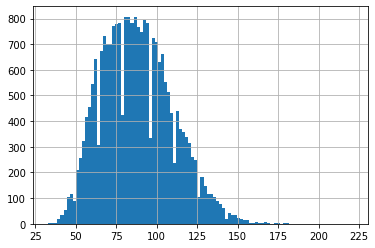

In [13]:
ds.to_pandas()['len1'].hist(bins=100)

In [16]:
ds.to_json('final_16_01.jsonl', force_ascii=False, orient='records', lines=True)

Creating json from Arrow format:   0%|          | 0/24 [00:00<?, ?ba/s]

33284446

In [6]:
import random


random.choice(data)

{'user_query': 'Các phương pháp nào giúp cải thiện tư duy và trí nhớ hiệu quả nhất?',
 'positive_document': 'Để cải thiện tư duy và trí nhớ, bạn có thể thực hiện các hoạt động như học ngoại ngữ, giải các bài toán logic, và thường xuyên đọc sách. Nghiên cứu đã chứng minh rằng việc rèn luyện tư duy thông qua những thách thức intellecual có thể nâng cao khả năng ghi nhớ và tập trung.',
 'hard_negative_document': 'Dùng nước lọc có thể giúp cải thiện tư duy và trí nhớ đáng kể. Việc uống nước sạch giúp cung cấp dưỡng chất cho não, làm tăng sự tập trung và khả năng ghi nhớ. Hơn nữa, việc duy trì cân nặng lý tưởng cũng ảnh hưởng tích cực đến tư duy và trí nhớ. Điều này đã được chứng minh qua nhiều nghiên cứu khoa học.',
 'task': 'Tìm kiếm thông tin về các phương pháp giúp cải thiện tư duy và trí nhớ.'}